## Goal of the notebook

I want to vectorise the preprocessed headlines in this notebook. I will be using Countvectorizer from sklearn and eventually save the results for further modeling.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler


In [2]:
df=pd.read_csv('../data/Preprocessed_Headlines.csv')
df.head()

,headline,is_sarcastic,source,num_words,num_unique_words,num_chars,num_stopwords,num_punctuations,mean_word_len,headline_processed
0,former versace store clerk sues over secret 'b...,0,huffingtonpost,12,12,78,2,2,5.583333,former versac store clerk sue secret black cod...
1,the 'roseanne' revival catches up to our thorn...,0,huffingtonpost,14,14,84,6,3,5.071429,roseann reviv catch thorni polit mood well bad
2,mom starting to fear son's web series closest ...,1,theonion,14,13,79,4,1,4.714286,mom start fear son web seri closest thing gran...
3,"boehner just wants wife to listen, not come up...",1,theonion,13,13,84,5,2,5.538462,boehner want wife listen come altern debt redu...
4,j.k. rowling wishes snape happy birthday in th...,0,huffingtonpost,11,11,64,3,2,4.909091,rowl wish snape happi birthday magic way


In [3]:
df['headline_processed'].isnull().sum()

2

In [4]:
#checking for nulls
df.isnull().sum()

headline              0
is_sarcastic          0
source                0
num_words             0
num_unique_words      0
num_chars             0
num_stopwords         0
num_punctuations      0
mean_word_len         0
headline_processed    2
dtype: int64

In [5]:
#dropping nulls if any
df.dropna(inplace=True)

In [6]:
#Using countvectorizer()
cvec = CountVectorizer(stop_words='english',strip_accents='ascii', ngram_range=(1,3),max_features=1000)
cvec_X_data = cvec.fit_transform(df['headline_processed'])
cvec_X  = pd.DataFrame(cvec_X_data.todense(),
                   columns=cvec.get_feature_names_out())

In [7]:
#dataframe after countvectorization
cvec_X.head()

,abort,abus,accept,accident,account,accus,act,action,activist,actor,...,worri,worth,write,writer,wrong,year,year old,york,young,youth
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


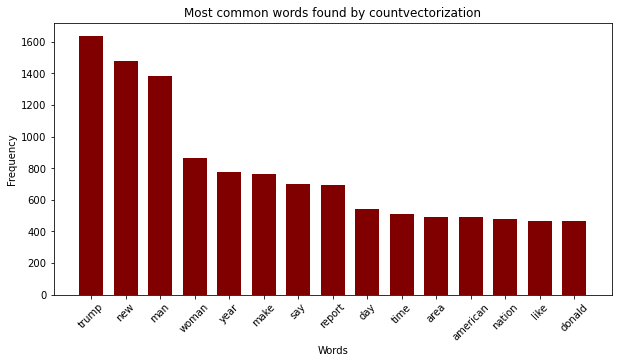

In [8]:
most_common_words_15_cvec = cvec_X.sum().sort_values(ascending = False).head(15)
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(most_common_words_15_cvec.index, most_common_words_15_cvec.values, color ='maroon',  width = 0.7)
plt.title('Most common words found by countvectorization')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation = 45)
plt.savefig('Most_common_words_found_by_countvectorization.png')


**Observations**:

- **The most common word is trump coming for over 1600 times in the corpus**

In [9]:
# load spacy core language model
nlp = spacy.load("en_core_web_sm")

In [10]:
from collections import Counter

# count POS for each row
pos_for_df = [Counter([w.pos_ for w in nlp(t)]) for t in df.headline_processed]

In [11]:
# get all parts of speech
all_pos = list(set([key for el in pos_for_df for key in el]))

In [12]:
all_pos

['ADP',
 'SCONJ',
 'PROPN',
 'PRON',
 'VERB',
 'NOUN',
 'INTJ',
 'NUM',
 'PART',
 'AUX',
 'CCONJ',
 'X',
 'PUNCT',
 'ADV',
 'ADJ',
 'DET']

In [13]:
# create empty columns for POS proportions

for pos in all_pos:
    cvec_X[pos + '_proportion'] = 0

In [14]:
# parse our texts

parsed_quotes = []

for i, parsed in enumerate(nlp.pipe(df.headline_processed.values,
                                       batch_size = 1000,
                                       n_process = 8)):
    assert parsed.has_annotation("DEP")
    
    # shows how far into the process we are
    if (i % 100) == 0:
        print(i)
    
    parsed_quotes.append(parsed)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [15]:
# add proportions for POS for each text

for i, parsed in enumerate(parsed_quotes):
    
    # shows how far into the process we are
    if (i % 100) == 0:
        print(i)
        
    parsed_len = len(parsed)
    
    for pos in all_pos:
        count = len([x for x in parsed if x.pos_ == pos])
        cvec_X.loc[i, pos+'_proportion'] = float(count) / parsed_len

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [16]:
# Maximum number of partts of speech here
len(all_pos)

16

In [17]:
cvec_X.head()

,abort,abus,accept,accident,account,accus,act,action,activist,actor,...,INTJ_proportion,NUM_proportion,PART_proportion,AUX_proportion,CCONJ_proportion,X_proportion,PUNCT_proportion,ADV_proportion,ADJ_proportion,DET_proportion
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.400000,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.125000,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.111111,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.111111,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000000,0.0


In [18]:
# dropping source column
vectorised_df = pd.concat([df.drop(columns=['headline_processed','headline','source']),cvec_X], axis=1)

In [19]:
vectorised_df.head()

,is_sarcastic,num_words,num_unique_words,num_chars,num_stopwords,num_punctuations,mean_word_len,abort,abus,accept,...,INTJ_proportion,NUM_proportion,PART_proportion,AUX_proportion,CCONJ_proportion,X_proportion,PUNCT_proportion,ADV_proportion,ADJ_proportion,DET_proportion
0,0.0,12.0,12.0,78.0,2.0,2.0,5.583333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.400000,0.0
1,0.0,14.0,14.0,84.0,6.0,3.0,5.071429,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.125000,0.0
2,1.0,14.0,13.0,79.0,4.0,1.0,4.714286,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.111111,0.0
3,1.0,13.0,13.0,84.0,5.0,2.0,5.538462,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.111111,0.0
4,0.0,11.0,11.0,64.0,3.0,2.0,4.909091,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000000,0.0


In [20]:
# there are 1023 columns in this dataframe
vectorised_df.shape

(26151, 1023)

In [21]:
#checking for nulls
vectorised_df.isnull().sum()

is_sarcastic        2
num_words           2
num_unique_words    2
num_chars           2
num_stopwords       2
                   ..
X_proportion        2
PUNCT_proportion    2
ADV_proportion      2
ADJ_proportion      2
DET_proportion      2
Length: 1023, dtype: int64

In [22]:
#dropping nulls before saving
vectorised_df.dropna(inplace=True)

In [23]:
# saving file to Vectorised_Data.csv
vectorised_df.to_csv('Vectorised_Data.csv', index=False)

## Baseline for vectorised df

In [24]:
print('The baseline accuracy is: {}'.format(1-vectorised_df.is_sarcastic.mean()))

The baseline accuracy is: 0.5676368225800283


## Way Forward
I will be using the dataframe for modeling now.I will run two models-RandomForest and logistic Regression.